<a href="https://colab.research.google.com/github/pankajrawat9075/Maze-Solving-AI/blob/main/Question1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist


Question 1

Load Dataset

In [ ]:
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Summarize loaded dataset

In [ ]:
print('Train: X = %s, y = %s' % (trainX.shape, trainY.shape))
print('Test: X = %s, y = %s' % (testX.shape, testY.shape))

Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


We normalize the Dataset to avoid numerical instability, it makes the algorithm more faster and helps to generalize the model against outliers or a feature.


In [ ]:
# Normalize the pixel values to the range [0, 1]
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

Display the Unique label images

unique_labels = [0 1 2 3 4 5 6 7 8 9]


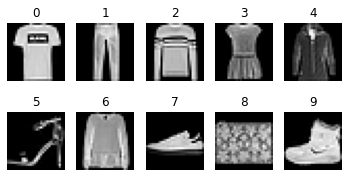

In [ ]:
# Get the unique labels
unique_labels = np.unique(trainY)
print("unique_labels = %s" % (unique_labels))

# Create a subplot for each label
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(6, 3))
axes = axes.flatten()

# Loop through the labels and display an image for each label
for i, label in enumerate(unique_labels):
    # Get the first image with this label
    img = trainX[trainY == label][0]
    # Plot the image
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(label)
    axes[i].axis('off')
    
plt.show()

Question 2

In [ ]:
class FeedForwardNN:
    def __init__(self, layers): 
      self.layers = layers   # 0th layer is the input layer
      self.L = len(layers)   # no. of layers 

      # initialize the weights and biases
      self.W = []
      self.B = []

      for i in range(1, self.L):
          w = np.random.randn(layers[i], layers[i-1])   # w[i][j] refers to the weight connecting the ith neuron in k layer to j neuron in k-1 layer
          b = np.random.randn(layers[i])                # b is bias vector
          self.W.append(w)
          self.B.append(b)

      self.A = []
      self.H = []
      self.Y_ = []

      for i in range(1, len(layers)):
          a = np.zeros(layers[i])
          h = np.zeros(layers[i])
          self.A.append(a)
          self.H.append(h)



    def sigmoid(self, x):                    # x is a vector here
        return 1 / (1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        return x * (1 - x)

      
    def softmax(x):
        x -= np.max(x)
        exp_x = np.exp(x)
        return exp_x / np.sum(exp_x)


    def train(self, X, Y, epochs, alpha):   # uses the gradient descent algorithm
        X = X.reshape(X.shape[0], -1)
        for epoch in range(epochs):
            for i in range(X.shape[0]):
              self.forward_prop(X[i])
              del_w, del_b = self.back_prop(Y[i])

              W -= alpha * del_w
              B -= alpha * del_b

    def forward_prop(self, x):
        self.A[0] = self.B[0] + np.dot(self.W[0], x) # for the first pre-activation layer x is the input 

        for i in range(0, self.L-1):
            self.H[i] = self.sigmoid(self.A[i])         # computing the activation layer 
            self.A[i+1] = self.B[i+1] + np.dot(self.W[i+1], self.H[i])

        self.Y_ = self.softmax(self.A[self.L-1])

    def back_prop(self, y):
        e_y = np.zeros(len(self.A[-1]))
        e_y[y] = 1

        del_A, del_W, del_B, del_H = self.A, self.W, self.B, self.H  # creating gradient variables

        del_A[-1] = -(e_y - self.Y_)

        for i in range(self.L-2, 0, -1):
            del_W[i] = np.dot( del_A[i], np.transpose( self.H[i-1] ) )  # compute gradients with respect to weihts and bias
            del_B[i] = del_A[i]

            del_H[i-1] = np.dot(np.transpose(self.W[i]), del_A[i])
            del_A[i-1] = del_H[i-1] * self.sigmoid_deriv(self.A[i-1])

      







    


    
 

In [ ]:
nn = FeedForwardNN([28*28, 5, 5, 10])
nn.train(trainX, trainY, 2, .0001)

IndexError: ignored